In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
plt.style.use("ggplot")


In [2]:
fpath = "C:/Users/davis/OneDrive/Documents/Case_study_and_LoanStats_2018Q2/LoanStats_2018Q2.csv"
raw_data = pd.read_csv(fpath, skiprows=1, low_memory=False)

data = raw_data.copy()

data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,60 months,20.39%,320.54,D,D4,Garage Man,10+ years,RENT,42000.0,Verified,Jun-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,440xx,OH,14.46,0.0,Nov-2007,1.0,NaN,NaN,4.0,0.0,8090.0,64.7%,9.0,w,11269.75,11269.75,1896.05,1896.05,730.25,1165.80,0.0,0.0,0.0,Jan-2019,320.54,Feb-2019,Jan-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,11968.0,1.0,1.0,0.0,1.0,24.0,3878.0,33.0,3.0,3.0,5445.0,50.0,12500.0,1.0,0.0,1.0,4.0,2992.0,4410.0,64.7,0.0,0.0,125.0,127.0,3.0,3.0,0.0,3.0,NaN,3.0,NaN,0.0,3.0,3.0,3.0,4.0,4.0,3.0,5.0,3.0,4.0,0.0,0.0,0.0,3.0,100.0,66.7,0.0,0.0,24138.0,11968.0,12500.0,11638.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,29150.0,29150.0,29150.0,60 months,20.39%,778.64,D,D4,Police Officer,10+ years,MORTGAGE,51000.0,Verified,Jun-2018,Current,n,NaN,NaN,home_improvement,Home improvement,807xx,CO,20.82,0.0,Feb-2003,1.0,49.0,NaN,11.0,0.0,12760.0,40.4%,34.0,w,27376.13,27376.13,4605.80,4605.80,1773.87,2831.93,0.0,0.0,0.0,Jan-2019,778.64,Feb-2019,Jan-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,177088.0,2.0,1.0,0.0,3.0,13.0,18790.0,83.0,3.0,3.0,3052.0,58.0,31600.0,0.0,0.0,2.0,7.0,16099.0,16854.0,39.6,0.0,0.0,184.0,176.0,1.0,1.0,4.0,1.0,NaN,3.0,NaN,0.0,7.0,8.0,8.0,12.0,15.0,9.0,15.0,8.0,11.0,0.0,0.0,0.0,4.0,97.1,37.5,0.0,0.0,201814.0,31550.0,27900.0,22714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,8000.0,8000.0,8000.0,36 months,13.06%,269.79,C,C1,Manager,10+ years,MORTGAGE,73000.0,Source Verified,Jun-2018,Current,n,NaN,NaN,other,O

In [29]:
data["loan_status_perf"] = data["loan_status"].map(
    {
        "Current": 0,
        "Fully Paid": 0,
        "In Grace Period": 0,
        "Late (16-30 days)": 1,
        "Late (31-120 days)": 1,
        "Charged Off": 1,
        "Default": 1,
    },
)


## Issued loans by issue month, loan type

In [3]:
data.issue_d.value_counts()


issue_d
May-2018    46311
Apr-2018    42928
Jun-2018    41533
Name: count, dtype: int64

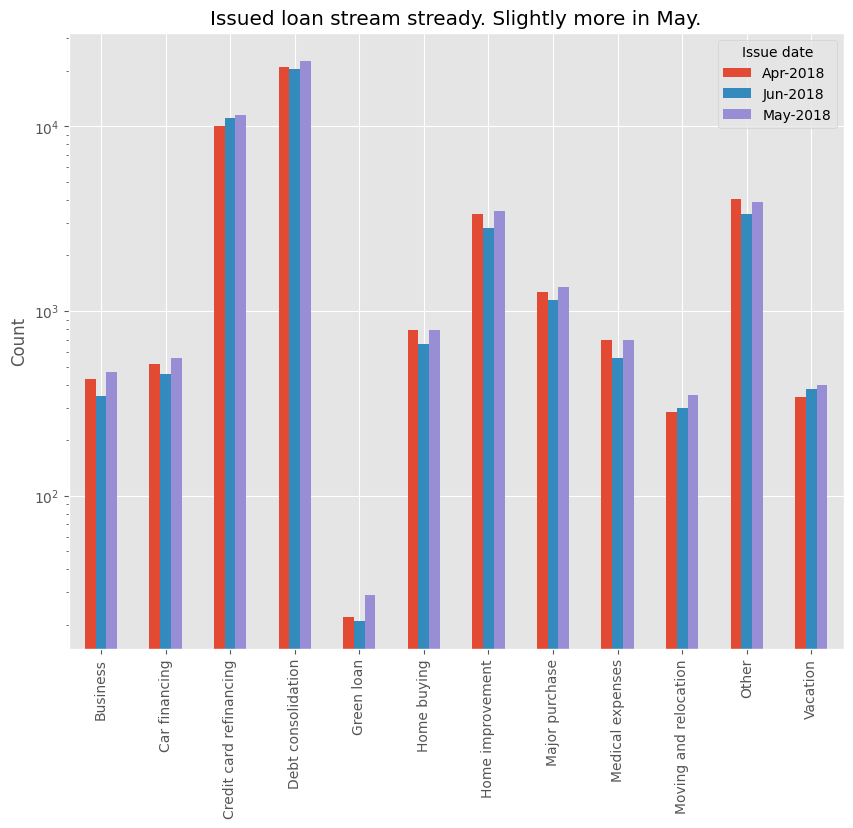

In [169]:
fig, ax = plt.subplots(figsize=(10, 8))

data.groupby(by=["title", "issue_d"]).count()["loan_amnt"].unstack().plot(
    kind="bar", logy=True, ax=ax
)

ax.set_xlabel("")
ax.set_ylabel("Count")
ax.set_title("Issued loan stream stready. Slightly more in May.")
ax.legend(title="Issue date")


## Exploring loan types: Vacation, Medical expenses, Moving and relocation

In [188]:
vaca_data = data.loc[data.title == "Vacation"]
med_data = data.loc[data.title == "Medical expenses"]
moving_data = data.loc[data.title == "Moving and relocation"]


In [20]:
vaca_data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
140,NaN,NaN,1000.0,1000.0,1000.0,36 months,23.87%,39.17,E,E2,Permanent teacher aide,10+ years,RENT,29000.0,Not Verified,Jun-2018,Current,n,NaN,NaN,vacation,Vacation,071xx,NJ,22.39,0.0,Nov-2004,0.0,NaN,NaN,11.0,0.0,6863.0,89.1%,12.0,f,825.72,825.72,282.37,282.37,174.28,108.09,0.0,0.0,0.0,Jan-2019,39.17,Feb-2019,Jan-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,19561.0,1.0,7.0,0.0,0.0,31.0,12698.0,57.0,1.0,2.0,3448.0,65.0,7700.0,0.0,0.0,0.0,2.0,1778.0,102.0,98.3,0.0,0.0,163.0,117.0,6.0,6.0,0.0,48.0,NaN,19.0,NaN,0.0,2.0,4.0,2.0,2.0,8.0,4.0,4.0,4.0,11.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,30074.0,19561.0,6000.0,22374.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,6000.0,6000.0,6000.0,36 months,20.39%,224.18,D,D4,Public safety officer,10+ years,RENT,50000.0,Source Verified,Jun-2018,Current,n,NaN,NaN,vacation,Vacation,112xx,NY,13.73,0.0,Jan-2001,0.0,NaN,NaN,12.0,0.0,14518.0,54.8%,20.0,w,3507.92,3507.92,2986.41,2986.41,2492.08,494.33,0.0,0.0,0.0,Jan-2019,500.00,Feb-2019,Jan-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,14518.0,3.0,0.0,0.0,0.0,NaN,0.0,NaN,3.0,4.0,2096.0,55.0,26500.0,0.0,0.0,0.0,5.0,1210.0,5217.0,41.4,0.0,0.0,NaN,209.0,5.0,2.0,0.0,5.0,NaN,21.0,NaN,0.0,4.0,10.0,5.0,9.0,0.0,11.0,19.0,10.0,12.0,0.0,0.0,0.0,4.0,100.0,20.0,0.0,0.0,26500.0,14518.0,8900.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
279,NaN,NaN,8000.0,8000.0,8000.0,36 months,12.13%,266.22,B,B5,Unit Clerk,7 years,RENT,34776.0,Source Verified,Jun-2018,Current,n,NaN,NaN,vacation,Vacation,959xx,CA,25.47,0.0,Oct-

In [215]:
moving_data.emp_title.str.lower().value_counts().sort_values(ascending=False).head(5)


emp_title
teacher             23
manager             16
registered nurse    11
general manager      8
rn                   7
Name: count, dtype: int64

Text(0.5, 0.98, 'Overall loan type profile')

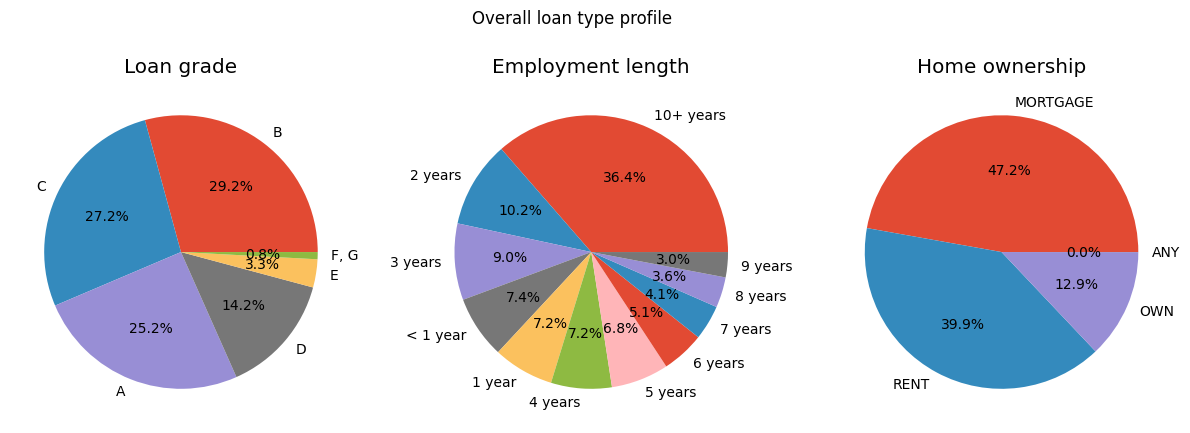

In [175]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.set_title("Loan grade")
ax2.set_title("Employment length")
ax3.set_title("Home ownership")

grade_adj = data.grade.map(
    {"F": "F, G", "G": "F, G", "A": "A", "B": "B", "C": "C", "D": "D", "E": "E"}
)

grade_adj.value_counts().plot(kind="pie", ax=ax1, autopct="%.1f%%")
data.emp_length.value_counts().plot(kind="pie", ax=ax2, autopct="%.1f%%")
data.home_ownership.value_counts().plot(kind="pie", ax=ax3, autopct="%.1f%%")

ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")

fig.suptitle("Overall loan type profile")


Text(0.5, 0.98, 'Vacation loan type profile')

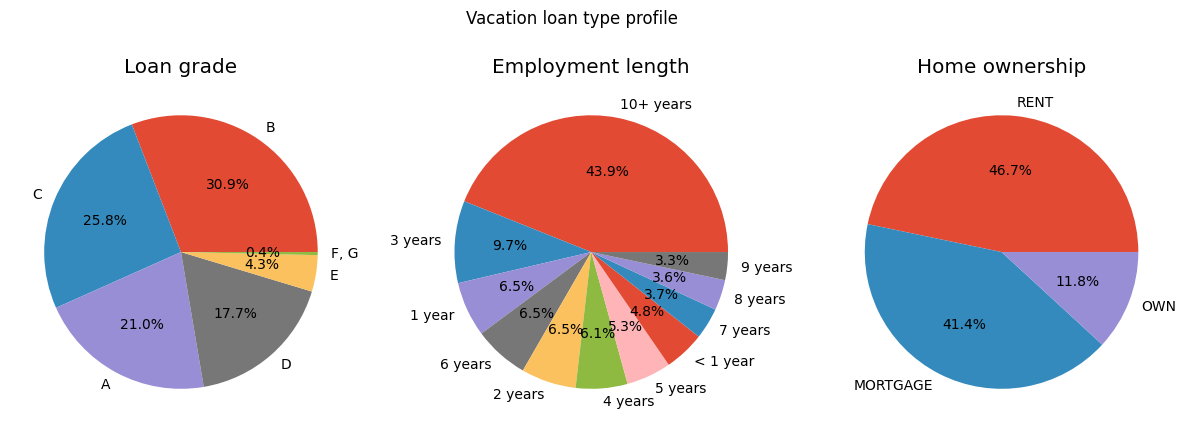

In [165]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.set_title("Loan grade")
ax2.set_title("Employment length")
ax3.set_title("Home ownership")

grade_adj = vaca_data.grade.map(
    {"F": "F, G", "G": "F, G", "A": "A", "B": "B", "C": "C", "D": "D", "E": "E"}
)

grade_adj.value_counts().plot(kind="pie", ax=ax1, autopct="%.1f%%")
vaca_data.emp_length.value_counts().plot(kind="pie", ax=ax2, autopct="%.1f%%")
vaca_data.home_ownership.value_counts().plot(kind="pie", ax=ax3, autopct="%.1f%%")

ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")

fig.suptitle("Vacation loan type profile")


Text(0.5, 0.98, 'Medical expenses loan type profile')

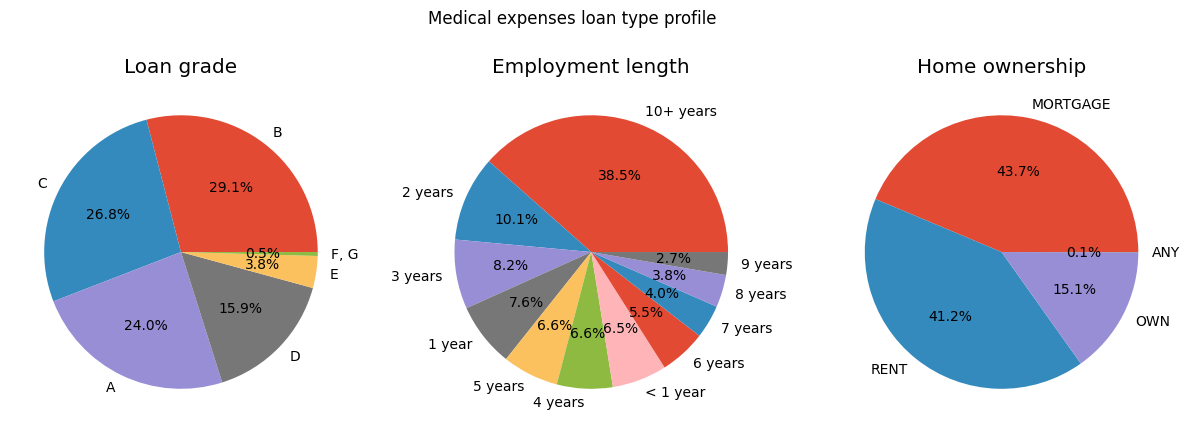

In [172]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.set_title("Loan grade")
ax2.set_title("Employment length")
ax3.set_title("Home ownership")

grade_adj = med_data.grade.map(
    {"F": "F, G", "G": "F, G", "A": "A", "B": "B", "C": "C", "D": "D", "E": "E"}
)

grade_adj.value_counts().plot(kind="pie", ax=ax1, autopct="%.1f%%")
med_data.emp_length.value_counts().plot(kind="pie", ax=ax2, autopct="%.1f%%")
med_data.home_ownership.value_counts().plot(kind="pie", ax=ax3, autopct="%.1f%%")

ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")

fig.suptitle("Medical expenses loan type profile")


Text(0.5, 0.98, 'Moving and relocation loan type profile')

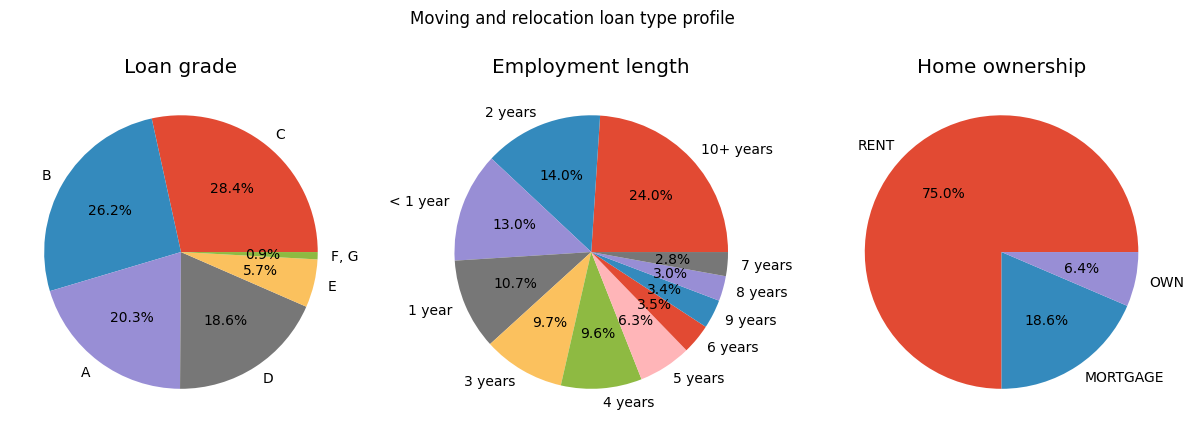

In [176]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.set_title("Loan grade")
ax2.set_title("Employment length")
ax3.set_title("Home ownership")

grade_adj = moving_data.grade.map(
    {"F": "F, G", "G": "F, G", "A": "A", "B": "B", "C": "C", "D": "D", "E": "E"}
)

grade_adj.value_counts().plot(kind="pie", ax=ax1, autopct="%.1f%%")
moving_data.emp_length.value_counts().plot(kind="pie", ax=ax2, autopct="%.1f%%")
moving_data.home_ownership.value_counts().plot(kind="pie", ax=ax3, autopct="%.1f%%")

ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")

fig.suptitle("Moving and relocation loan type profile")


In [63]:
haha = data.groupby(by=["title", "loan_status_perf"]).count()["loan_amnt"].unstack()
haha["tot"] = haha.apply(sum, axis=1)
haha = haha.rename({0.0: "perform", 1.0: "no-perform"}, axis=1)

haha["ratio_perform"] = haha.perform / haha.tot
haha["ratio_non_perform"] = 1 - haha["ratio_perform"]

haha


loan_status_perf,perform,no-perform,tot,ratio_perform,ratio_non_perform
title,,,,,
Business,1143,100,1243,0.919549,0.080451
Car financing,1461,64,1525,0.958033,0.041967
Credit card refinancing,32025,797,32822,0.975718,0.024282
Debt consolidation,61669,2472,64141,0.961460,0.038540
Green loan,69,3,72,0.958333,0.041667
Home buying,2131,109,2240,0.951339,0.048661
Home improvement,9278,374,9652,0.961252,0.038748
Major purchase,3563,200,3763,0.946851,0.053149
Medical expenses,1842,116,1958,0.940756,0.059244


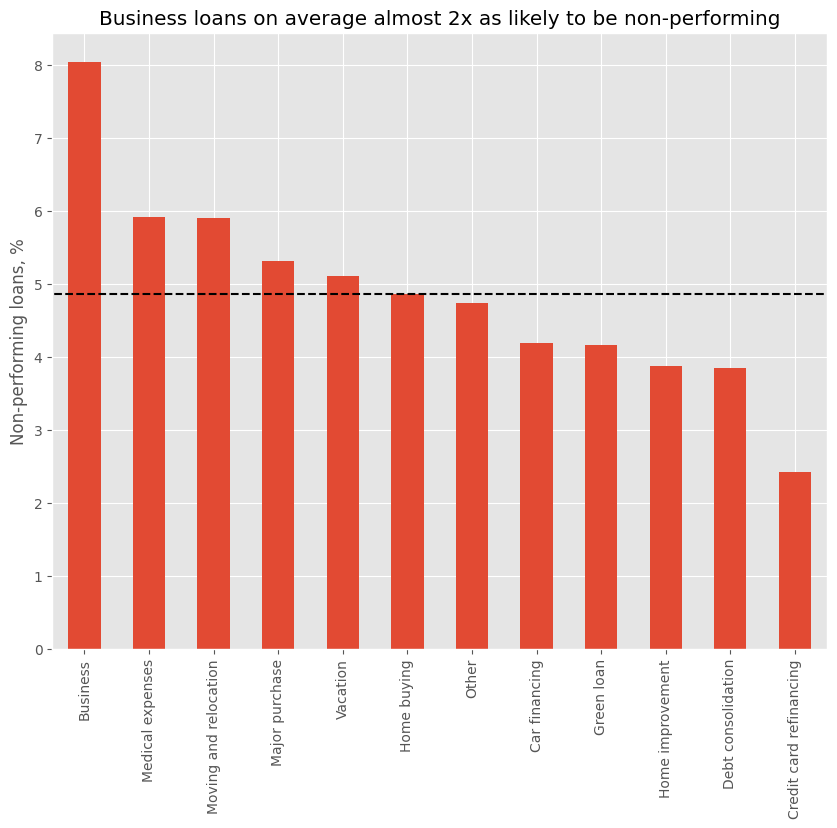

In [87]:
fig, ax = plt.subplots(figsize=(10, 8))
(haha.loc[:, "ratio_non_perform"].sort_values(ascending=False) * 100).plot(
    kind="bar", ax=ax
)

avg_non_perform_ratio = haha.ratio_non_perform.mean()

ax.hlines(
    avg_non_perform_ratio * 100, xmin=-5, xmax=20, linestyles="dashed", colors="black"
)
ax.set_xlabel("")
ax.set_ylabel("Non-performing loans, %")
ax.set_title("Business loans on average almost 2x as likely to be non-performing")
ax.legend().remove()


In [105]:
data["int_rate"] = pd.to_numeric(data["int_rate"].str.replace(" %", ""))


AttributeError: Can only use .str accessor with string values!

In [109]:
data.groupby(by=["title"])["int_rate"].mean().sort_values(ascending=False)


title
Green loan                 13.985556
Moving and relocation      13.595054
Debt consolidation         13.222246
Business                   13.114473
Vacation                   13.062350
Other                      12.980791
Medical expenses           12.778172
Major purchase             12.181475
Home buying                12.167170
Car financing              12.037875
Home improvement           11.867169
Credit card refinancing    11.336006
Name: int_rate, dtype: float64

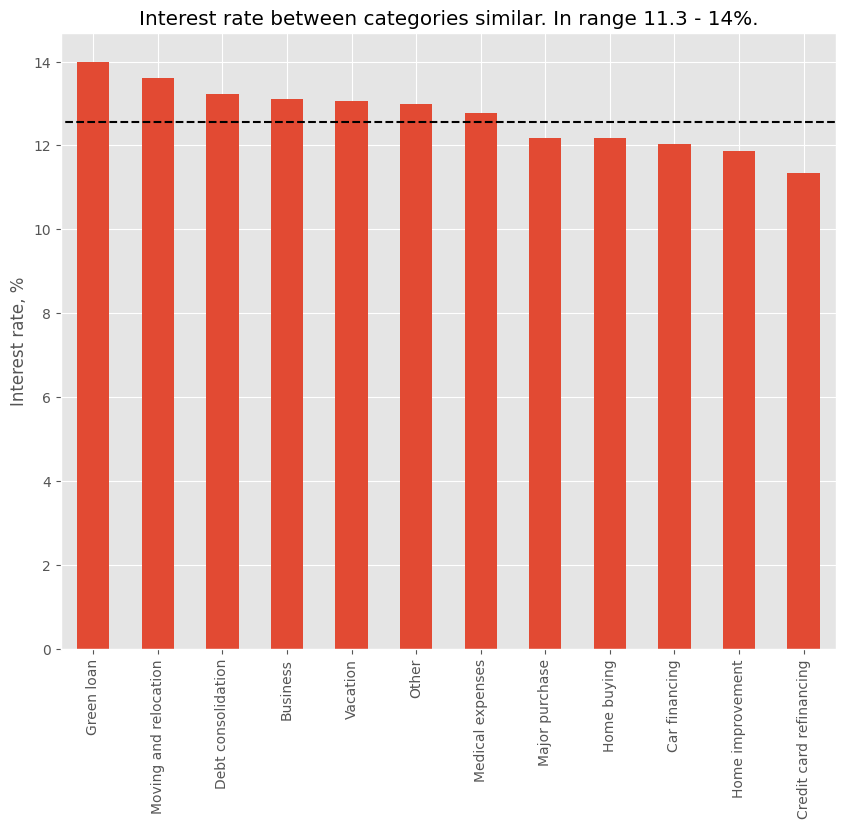

In [118]:
fig, ax = plt.subplots(figsize=(10, 8))
data.groupby(by=["title"])["int_rate"].mean().sort_values(ascending=False).plot(
    kind="bar", ax=ax
)

mean_int_rate = data["int_rate"].mean()

ax.hlines(mean_int_rate, xmin=-5, xmax=20, linestyles="dashed", colors="black")
ax.set_xlabel("")
ax.set_ylabel("Interest rate, %")
ax.set_title("Interest rate between categories similar. In range 11.3 - 14%.")
ax.legend().remove()


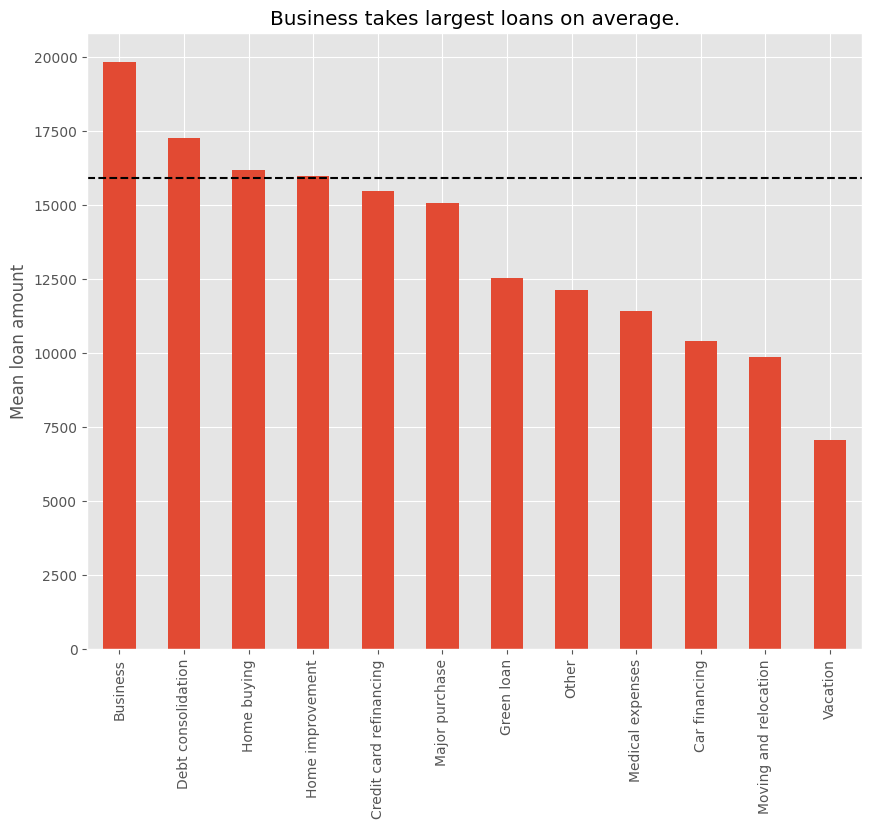

In [121]:
fig, ax = plt.subplots(figsize=(10, 8))
data.groupby(by=["title"])["loan_amnt"].mean().sort_values(ascending=False).plot(
    kind="bar", ax=ax
)

mean_loan_amnt = data["loan_amnt"].mean()

ax.hlines(mean_loan_amnt, xmin=-5, xmax=20, linestyles="dashed", colors="black")
ax.set_xlabel("")
ax.set_ylabel("Mean loan amount")
ax.set_title("Business takes largest loans on average.")
ax.legend().remove()
